## 주식수익률의 Return & Risk

In [2]:
# 기본 라이브러리 호출하기

import pandas as pd
import numpy as np
import FinanceDataReader as fdr

## 1. 삼성전자 일별수익률 이용

### 1-1. 삼성전자 일별 주가수익률 데이터 수집 

In [3]:
# 삼성전자 변수 설정 = sm
# 삼성전자(005930)  일별수익률 불러오기

sm = fdr.DataReader("005930","20220101","20221231")

# 불러온 자료 보기
sm

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
...,...,...,...,...,...,...
2022-12-23,58200,58400,57700,58100,9829407,-0.016920
2022-12-26,58000,58100,57700,57900,6756411,-0.003442
2022-12-27,58000,58400,57900,58100,10667027,0.003454


### 1-2. 기초 통계량

In [4]:
sm.describe()

,Open,High,Low,Close,Volume,Change
count,246.000000,246.000000,246.000000,246.000000,2.460000e+02,246.000000
mean,63996.341463,64493.495935,63458.943089,63935.365854,1.448451e+07,-0.001311
std,6709.763434,6618.912172,6623.950152,6625.615818,4.890389e+06,0.014336
min,52300.000000,53600.000000,51800.000000,52600.000000,5.767902e+06,-0.036975
25%,58700.000000,59225.000000,58200.000000,58800.000000,1.103933e+07,-0.010952
50%,61650.000000,62000.000000,61050.000000,61700.000000,1.362839e+07,-0.001744
75%,68800.000000,69225.000000,68575.000000,69000.000000,1.693226e+07,0.006305
max,79500.000000,79800.000000,78600.000000,78900.000000,3.794336e+07,0.044964


In [5]:
# 기초 통계량 해석하기

# 평균 (기대수익률)
# 일수익률 평균 (-0.001311) x 252 = -33%
# 일수익률 위험(표준편차) 0.014336 x 252 제곱근 = 22.75%

# 이 의미는? (95% 신뢰수준) -77% ~ 11%

### 1-3. 정규성 검정

In [6]:
# 시각화 도구 호출하기 
# warning 제거

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# matplotlib 은 그래프 :  rcParams (Runtime Configuration Parameters) 딕셔너리의 값을 이용
# 시각화 툴인 Matplotlib에서 한글폰트 사용 = 맑은고딕

plt.rcParams['font.family'] = 'Malgun Gothic'

# matplotlib 에서 한글이 깨지는 현상 대비

plt.rcParams['axes.unicode_minus'] = False

#### 1) 히스토그램 

<AxesSubplot:xlabel='Change', ylabel='Density'>

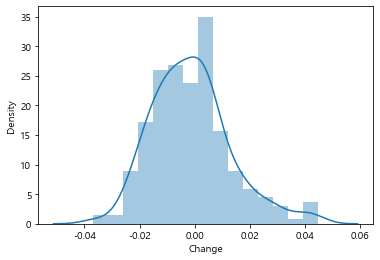

In [37]:
sns.distplot(sm["Change"])

#### 2) Shapiro-Wilk test

In [38]:
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import kstest

In [39]:
# Shapiro-Wilk test
# 귀무가설 : 정규성이다.  대립가설 : 정규성을 아니다.
# p-value > 0.05 (유의수준) 경우 :  정규성이다. --> 정규성이 담보되어야 한다.

stats.shapiro(sm["Change"])

ShapiroResult(statistic=0.971842348575592, pvalue=8.57427075970918e-05)

In [40]:
# KS 테스트
# p-value 가 0.05 이상이면 정규성이 있다 0.05보다 작으면 정규성이 없다고 판단
kstest(sm["Change"],'norm')

KstestResult(statistic=0.4852525533620621, pvalue=7.213577457714635e-54)

## 2.  삼성전자 월별 주가수익률 이용 (3년치 데이터)

### 2-1. 데이터 수집하기

In [11]:
sm2 = fdr.DataReader("005930","20200101","20221231")
sm2

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921
...,...,...,...,...,...,...
2022-12-23,58200,58400,57700,58100,9829407,-0.016920
2022-12-26,58000,58100,57700,57900,6756411,-0.003442
2022-12-27,58000,58400,57900,58100,10667027,0.003454


### 2-2.  월별데이터 계산을 위한 데이터 추출하기

In [12]:
# 1. index 초기화
sm2.reset_index(inplace=True)

In [13]:
# 월말 데이터로 변경하기 위한 Group by 이용 데이터 수정
how = {
    'Open' : 'first',
    'High' : 'max',
    'Low' : 'min',
    'Close' : 'last',
    'Volume' : 'sum'

}
sm2_month = sm2.groupby(pd.Grouper(key='Date',freq='m')).agg(how)
sm2_month

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-31,55500,62800,54600,56400,319891636
2020-02-29,55500,62000,54200,54200,360007160
2020-03-31,54300,58000,42300,47750,856741868
2020-04-30,47450,52000,45350,50000,424101937
2020-05-31,48900,51200,47200,50700,374264673
2020-06-30,50800,57000,49900,52800,517439261
2020-07-31,53400,60400,52100,57900,437314531
2020-08-31,57800,59900,54000,54000,401697954
2020-09-30,54100,61300,54100,58200,426302298


### 2-3. 월별수익률 구하기 

In [14]:
# 월별 데이터의 수익률 구하기
sm2_month["Change"] = sm2_month["Close"].pct_change()
sm2_month

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-31,55500,62800,54600,56400,319891636,NaN
2020-02-29,55500,62000,54200,54200,360007160,-0.039007
2020-03-31,54300,58000,42300,47750,856741868,-0.119004
2020-04-30,47450,52000,45350,50000,424101937,0.047120
2020-05-31,48900,51200,47200,50700,374264673,0.014000
2020-06-30,50800,57000,49900,52800,517439261,0.041420
2020-07-31,53400,60400,52100,57900,437314531,0.096591
2020-08-31,57800,59900,54000,54000,401697954,-0.067358
2020-09-30,54100,61300,54100,58200,426302298,0.077778


In [15]:
# 결측치 제거
sm2_month.dropna(inplace=True)
sm2_month

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-02-29,55500,62000,54200,54200,360007160,-0.039007
2020-03-31,54300,58000,42300,47750,856741868,-0.119004
2020-04-30,47450,52000,45350,50000,424101937,0.047120
2020-05-31,48900,51200,47200,50700,374264673,0.014000
2020-06-30,50800,57000,49900,52800,517439261,0.041420
2020-07-31,53400,60400,52100,57900,437314531,0.096591
2020-08-31,57800,59900,54000,54000,401697954,-0.067358
2020-09-30,54100,61300,54100,58200,426302298,0.077778
2020-10-31,57500,61500,56600,56600,327557687,-0.027491


### 2-4. 기초 통계량

In [16]:
sm2.describe()

,Open,High,Low,Close,Volume,Change
count,742.000000,742.000000,742.000000,742.000000,7.420000e+02,742.000000
mean,66803.234501,67416.981132,66174.730458,66755.660377,1.845475e+07,0.000126
std,11148.256960,11182.976751,11110.728344,11129.413330,8.689074e+06,0.016717
min,42600.000000,43550.000000,42300.000000,42500.000000,5.767902e+06,-0.063877
25%,58000.000000,58600.000000,57500.000000,58000.000000,1.293435e+07,-0.010265
50%,66150.000000,66800.000000,65450.000000,66200.000000,1.633133e+07,0.000000
75%,77275.000000,77700.000000,76600.000000,77175.000000,2.159724e+07,0.008382
max,90300.000000,96800.000000,89500.000000,91000.000000,9.030618e+07,0.104706


In [17]:
# 해석하기
# 평균(기대수익) 0.000126 x12 = 0.001512
# 위험 (표준편차) 0.016717 x 12제곱근 = 5.8%
# 95% 신뢰수준에서 ???

#### 2-5 정규성 검정

#### 1) 히스토그램

<AxesSubplot:xlabel='Change', ylabel='Density'>

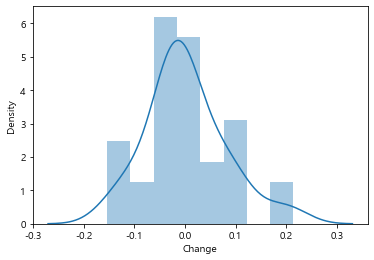

In [18]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.distplot(sm2_month["Change"])

In [19]:
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import kstest

 #### 2)  Shapiro-Wilk test

In [20]:
# p-value > 0.05 :  정규성이 존재한다고 판단
stats.shapiro(sm2_month["Change"])

ShapiroResult(statistic=0.9611257910728455, pvalue=0.24709245562553406)

#### 3)  KS테스트

In [21]:
kstest(sm2_month["Change"],'norm')

KstestResult(statistic=0.43868554584184977, pvalue=1.1966786371411487e-06)

In [36]:
a = kstest(sm2_month["Change"],'norm')[1]
print('{:.10f}'.format(a))

0.0000011967
